In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
bls_df = pd.read_csv("BLSDataset_2016.csv")

us_df = bls_df[bls_df["area_type"] == 1]
us_df.drop(["own_code","annual",'Unnamed: 29', "occ code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
us_df.dropna(axis=1, inplace=True)

state_df = bls_df[(bls_df["area_type"] == 2) & (bls_df["area_title"] != "District of Columbia")]
state_df.drop(["own_code","annual",'Unnamed: 29', "occ code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
state_df.dropna(axis=1, inplace=True)

In [73]:
us_aavg = us_df[us_df["group"] == "detailed"]
us_aavg.drop_duplicates(["occ title"], keep="first", inplace=True) 
us_aavg[' a_mean '] = us_aavg[' a_mean '].str.replace(',', '')  #remove comma in numbers
us_aavg[' a_mean '] = us_aavg[' a_mean '].str.replace('*', '0')
us_aavg[' a_mean '] = us_aavg[' a_mean '].astype(int)           #convert string to integers
us_aavg.sort_values(" a_mean ", ascending = False, inplace=True)
us_top10 = us_aavg[["occ title", " a_mean "]].head(10)

In [40]:
#Total Employment
state_employ = state_df[state_df["group"] == "total"]
state_employ["tot_emp"] = state_employ['tot_emp'].str.replace(',', '')  #remove comma in numbers
state_employ["tot_emp"] = state_employ["tot_emp"].astype(int)  
state_employ.sort_values("tot_emp", ascending=False, inplace=True)
state_employ[["area_title", "tot_emp"]].head(10)

,area_title,tot_emp
184563,California,15966580
184602,Texas,11745250
184591,New York,9097650
184568,Florida,8222030
184572,Illinois,5903820
184597,Pennsylvania,5747020
184594,Ohio,5337890
184592,North Carolina,4231020
184569,Georgia,4214410
184581,Michigan,4212090


In [77]:
#State Average Annual Income
state_aavg = state_df[state_df["group"] == "total"]
state_aavg[" a_mean "] = state_aavg[' a_mean '].str.replace(',', '')  #remove comma in numbers
state_aavg[" a_mean "] = state_aavg[" a_mean "].astype(int)     
state_aavg.sort_values(" a_mean ", ascending=True, inplace=True)
state_aavg[["area_title", " a_mean "]].head(10)

,area_title,a_mean
184583,Mississippi,38300
184562,Arkansas,39590
184600,South Dakota,40070
184607,West Virginia,40250
184577,Louisiana,41260
184585,Montana,41440
184599,South Carolina,41530
184576,Kentucky,41760
184571,Idaho,41910
184601,Tennessee,42350


In [69]:
#California Occupation with the highest average annual income
cali_df = state_df[(state_df["area_title"] == "California") & (state_df["group"] == "detailed")] 
cali_df[' a_mean '] = cali_df[' a_mean '].str.replace(',', '') 
cali_df = cali_df[cali_df[' a_mean '] != "*"]                  # remove N/A observations
cali_df[' a_mean '] = cali_df[' a_mean '].astype(int)          
cali_df.sort_values(" a_mean ", ascending=False, inplace=True)
cali_top10 = cali_df[["occ title", " a_mean "]].head(10)
cali_top10

,occ title,a_mean
198440,Anesthesiologists,282410
198687,Psychiatrists,252030
198188,Oral and Maxillofacial Surgeons,235370
198738,Surgeons,232300
198589,Obstetricians and Gynecologists,219560
184665,Chief Executives,216840
199406,Nurse Anesthetists,215530
198540,"Internists, General",207130
198788,"Physicians and Surgeons, All Other",201790
198489,Family and General Practitioners,198010


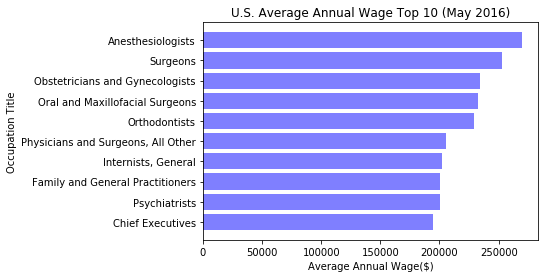

In [75]:
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(us_top10[' a_mean ']))
yticks = us_top10['occ title'].str.replace('Occupations', '')

ax.barh(y_pos, us_top10[' a_mean '], color = "blue", alpha = .5)
ax.set_yticks(y_pos)
ax.set_yticklabels(yticks)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Annual Wage($)')
ax.set_ylabel('Occupation Title')
ax.set_title('U.S. Average Annual Wage Top 10 (May 2016)')
plt.savefig("Top 10", bbox_inches="tight")
plt.show()

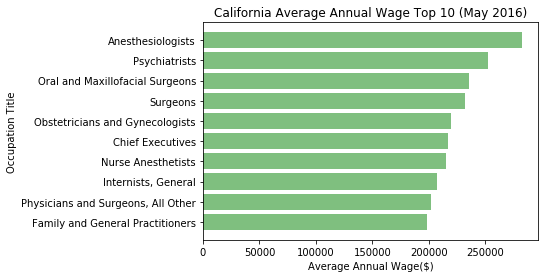

In [76]:
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(cali_top10[' a_mean ']))
yticks = cali_top10['occ title'] #.str.replace('Occupations', '')
ax.barh(y_pos, cali_top10[' a_mean '],color = 'green', alpha = .5)
ax.set_yticks(y_pos)
ax.set_yticklabels(yticks)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Annual Wage($)')
ax.set_ylabel('Occupation Title')
ax.set_title('California Average Annual Wage Top 10 (May 2016)')
plt.savefig("Top 10 state",bbox_inches="tight")
plt.show()

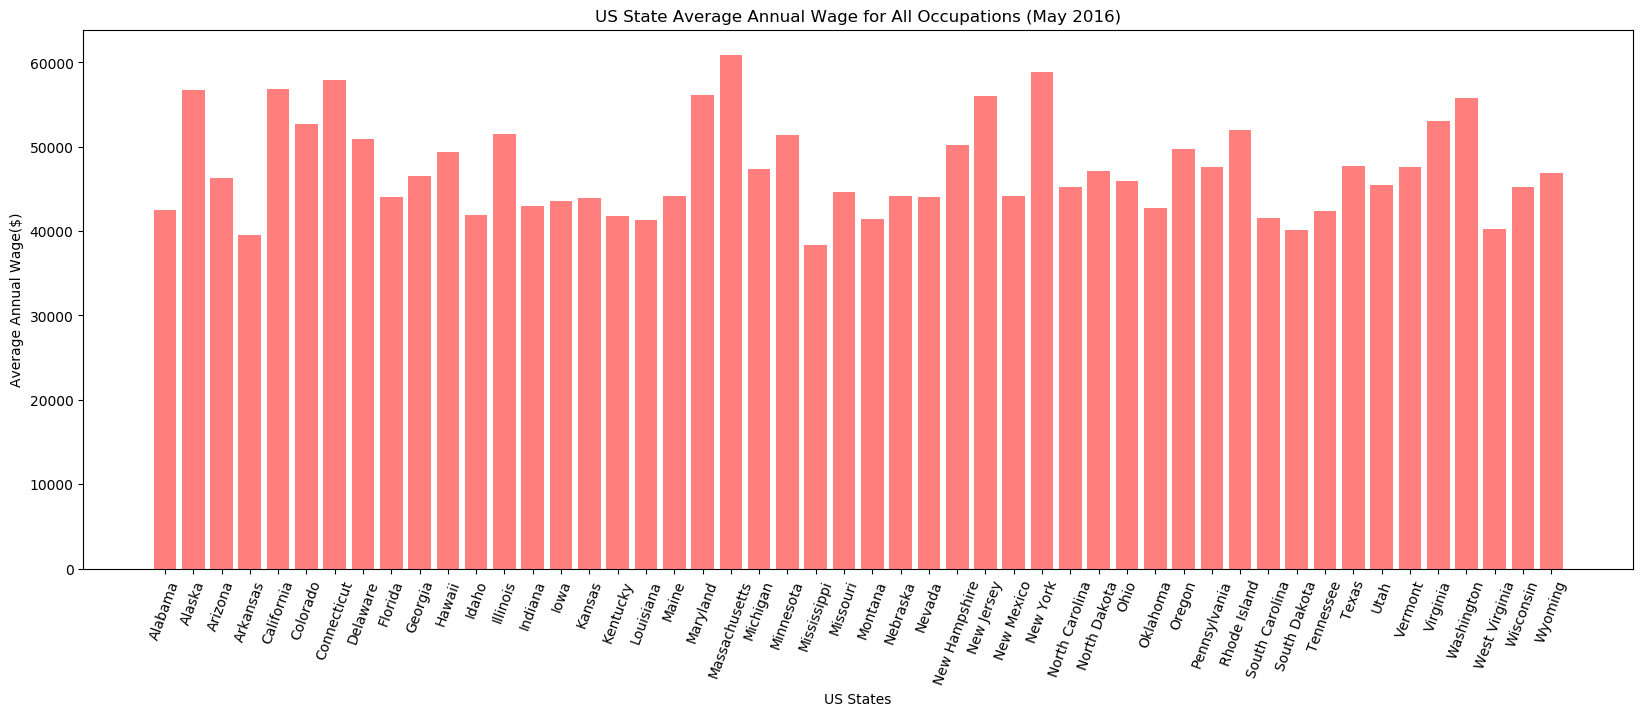

In [436]:
x = np.arange(50)
plt.figure(figsize=(20, 7))
plt.bar(x, state_aavg[" a_mean "], color = "red", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Average Annual Wage($)")
plt.title("US State Average Annual Wage for All Occupations (May 2016)")
plt.xticks(x, state_aavg["area_title"], rotation = 70)
plt.show()

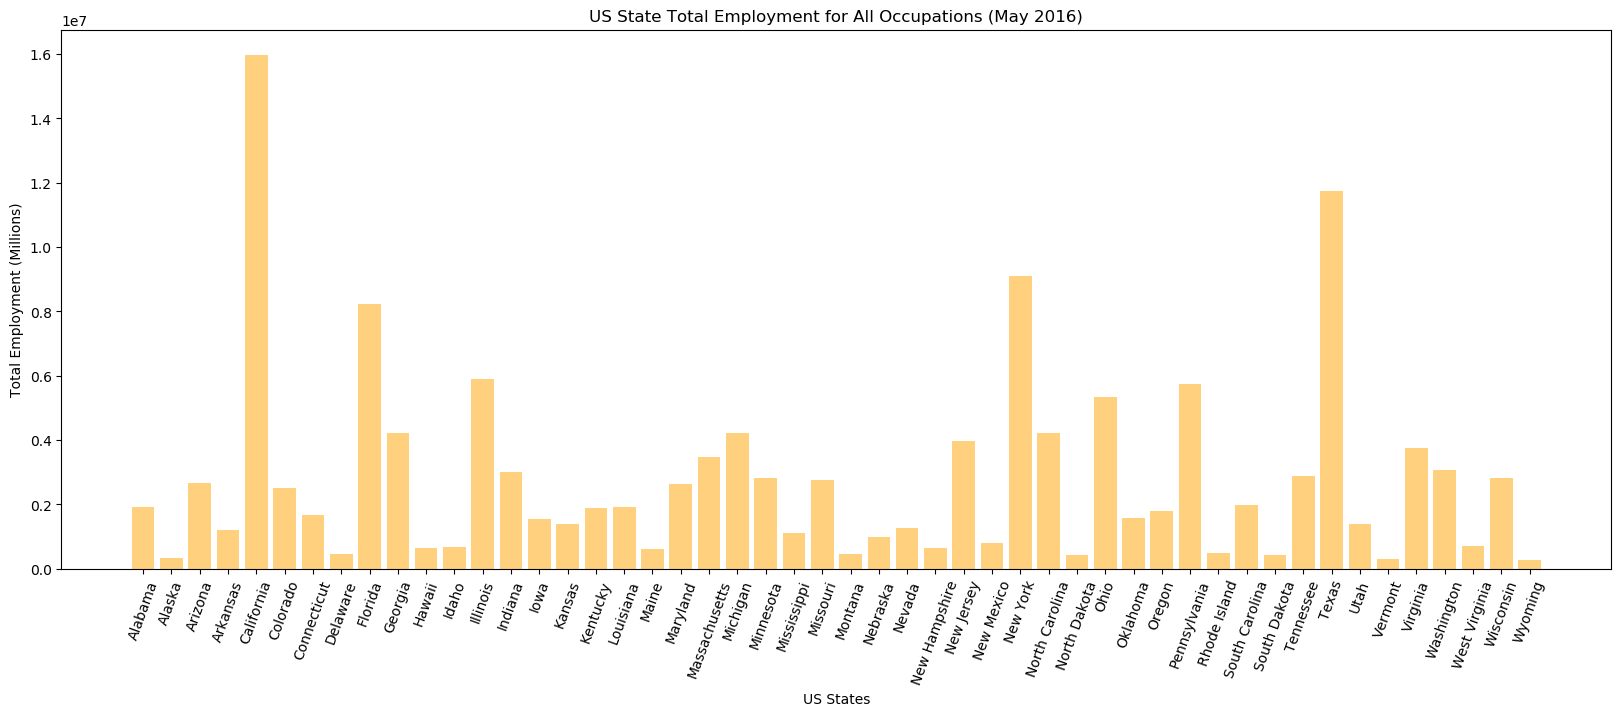

In [430]:
plt.figure(figsize=(20, 7))
plt.bar(x, state_employ["tot_emp"], color ="orange", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Total Employment (Millions)")
plt.title("US State Total Employment for All Occupations (May 2016)")
plt.xticks(x, state_employ["area_title"], rotation = 70)
plt.show()